# Python Program for Analysis of Fake Data Creations for different Sizes
Write Python code that can create a CSV containing 10 columns of text data​

Each entry in each row should be between 3 and 25 characters
Adjacent rows in a CSV should not be the same
Generate files of size {0.1, 1, 5, 10, 100, 500} MB of data
Execution time for creating all of the data to be written to file should take less than 5 minutes. (Email me if you do not solve this in less than an hour.)

The precision of the file sizes is +/- 20%.

Measure how much time it takes to write each CSV file to disk. In your measurement do not include the time used in creating the CSV files. Perform this measurement three times per file size. Each measurement is of a different CSV. That's three different files per file size.​

Measure how much time it takes for your computer to load the data from the CSV on disk into a Pandas dataframe. Perform this measurement three times per file size. Each measurement is of a different CSV.​

Results: ​

table of values (file size versus read time and write time for each experiment) ​
Plot the average write times and average load times versus file size in a single scatter plot​ with semilogx scale
Submit your python notebook (.ipynb file) containing the code for the experiment (creating files, running the timing experiments) and the results. ​

Do not include the CSV files in your submission.



For this assignment, please ignore the rubric's runtime constraint for notebook.

In [1]:
!pip install random-word

installing random word library that i will be using to fill all my dataframe with random words.

In [2]:
from random_word import RandomWords
import pandas as pd
import random as rd
import numpy as np
import sys
import csv
import matplotlib.pyplot as plt
import time

Importing Randomwords and random to ramdomly select all my words
and also imoorting pandas and numpy and all required modules.

In [3]:
def getDataframe(words):
    start_time=time.time()
    list_of_rows=[]
    num_rows=1000
    for indx in range(num_rows):
        list_of_rows.append({'A':rd.choice(words),
                              'B':rd.choice(words),
                              'C':rd.choice(words),
                              'D':rd.choice(words),
                              'E':rd.choice(words),
                              'F':rd.choice(words),
                              'G':rd.choice(words),
                              'H':rd.choice(words),
                              'I':rd.choice(words),
                              'J':rd.choice(words)})
        df_frame = pd.DataFrame(list_of_rows)
    return df_frame

   The above function creates a dataframe of 0.1 mb in size with all random words filled.

In [4]:
def WriteCsv_to_disk(dframes,experiments):
    write_times=[]   
    start_time = time.time()
    for dataframe in dframes:
        for count in range(0,experiments):   
            file='File Test'+str(count+1)+'_'+str(round(sys.getsizeof(dataframe)/(1024*1024),2))+'_MB_.csv'
            filenames.append(file)
            dataframe.to_csv(file,index=False)    
            write_times.append(time.time() - start_time)
    return write_times

The above function takes all the required dataframes(In this case , the dframes expects 6 as per the objective and number of experiments to be 6)
Then it records each file and experiments time to a list. It has to be 18 different writing times in a list.

In [5]:
def Read_from_Csv():
    readTimes=[]
    start_time = time.time()
    for file in filenames:
        read_df=pd.read_csv(file)
        readTimes.append(time.time()-start_time)  
    return readTimes

Same as above function, It records all files read time  and returns a list to the calling variable.

In [6]:
def getTabledData(dframes,experiments):
    recorded_dframe=pd.DataFrame(columns=('experimented_files','write_time','read_Time'))
    recorded_dframe['write_time']=WriteCsv_to_disk(dframes,experiments)
    recorded_dframe['read_Time']=Read_from_Csv()
    recorded_dframe['experimented_files']=filenames
    return recorded_dframe

The aove function calls write and read functions by passing the dframes and experiments. The output from this function is a dframe with columns experimented_files,write_time and read_Time.

# Execution Starts from here

In [7]:
experiments = 3     ## Number of Experiments
Sizes = [0.1, 1, 5, 10, 100, 500]     ##File Different Sizes
start_time = time.time()        ##Setting Start Time

In [8]:
r = RandomWords()       ##Storing all list of random words to a list

In [9]:
words=r.get_random_words(minLength=3,maxLength=25)

# The below lines creates different dataframes on concat.

In [10]:
list_of_dframes=[]
df=getDataframe(words)
list_of_dframes.append(df)
list_of_dframes.append(pd.concat([df]*10))      ##Creates 1 MB
list_of_dframes.append(pd.concat([df]*10*5))    ##Creates 5 mb
list_of_dframes.append(pd.concat([df]*10*5*2))  ## Creates 10 mb
list_of_dframes.append(pd.concat([df]*10*5*2*10))   ##Creates 100mb
list_of_dframes.append(pd.concat([df]*10*5*2*10*5))  ##Creates 500 mb

# The below Cell takes min of 4 min to execute.

In [11]:
filenames=[]      ##I am recording all filenames in a list
final_df=getTabledData(list_of_dframes,experiments)       ##Calling our user defined function to get a dframe of read and write times.

# Check the read and write times for each file below

In [12]:
final_df

,experimented_files,write_time,read_Time
0,File Test1_0.63_MB_.csv,0.026935,0.004986
1,File Test2_0.63_MB_.csv,0.040891,0.009973
2,File Test3_0.63_MB_.csv,0.052858,0.013963
3,File Test1_6.37_MB_.csv,0.140624,0.031914
4,File Test2_6.37_MB_.csv,0.221406,0.049867
5,File Test3_6.37_MB_.csv,0.316144,0.066821
6,File Test1_31.84_MB_.csv,0.706134,0.141622
7,File Test2_31.84_MB_.csv,1.192800,0.202459
8,File Test3_31.84_MB_.csv,1.689473,0.263315
9,File Test1_63.69_MB_.csv,2.550112,0.379985


# We need an average of all files. Since we have divided each size in 3 experiments.
# The resultant dataframe is the average of read and write times in seconds

# I have just added a column which are sizes . This is required to plot as per the objective 

In [13]:
Average_read_write_Times = final_df.groupby(np.arange(len(final_df))//3).mean()
Average_read_write_Times['FileSize(MB)']=Sizes
Average_read_write_Times

,write_time,read_Time,FileSize(MB)
0,0.040228,0.009641,0.1
1,0.226058,0.049534,1.0
2,1.196136,0.202465,5.0
3,3.424950,0.500662,10.0
4,18.839075,2.996656,100.0
5,102.847633,15.143506,500.0


# Scatter plot of Average Times of Different File Sizes.( Semilogx Scale)

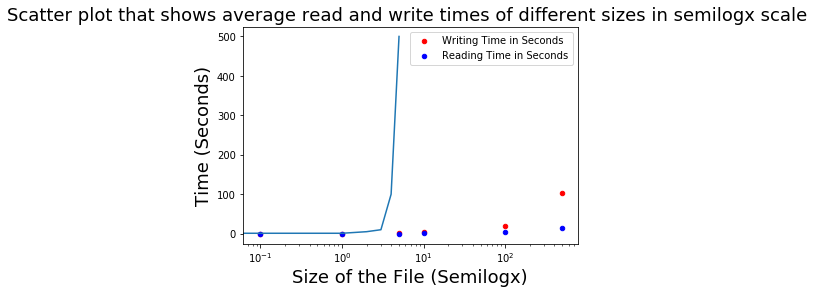

In [14]:
subplot = Average_read_write_Times.plot(kind="scatter", x="FileSize(MB)",y="write_time", color="r", label="Writing Time in Seconds")
Average_read_write_Times.plot(kind = 'scatter', x="FileSize(MB)",y="read_Time", color="b", label="Reading Time in Seconds", ax=subplot)
subplot.set_xlabel("Size of the File (Semilogx)",fontsize=18)
subplot.set_ylabel("Time (Seconds)",fontsize=18)
_=plt.title('Scatter plot that shows average read and write times of different sizes in semilogx scale ',fontsize=18)
_=plt.semilogx(Average_read_write_Times['FileSize(MB)'])    ##Using Semilogx for x-axis.
_ = plt.show()